In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)
df = pd.read_csv("../data/who_suicide_statistics.csv")

df.head()

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0


In [17]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43776 entries, 0 to 43775
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      43776 non-null  object 
 1   year         43776 non-null  int64  
 2   sex          43776 non-null  object 
 3   age          43776 non-null  object 
 4   suicides_no  41520 non-null  float64
 5   population   38316 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.0+ MB


In [18]:
print("Shape of dataset:", df.shape)


Shape of dataset: (43776, 6)


In [19]:
df = df.dropna(subset=["suicides_no", "population"])
df.shape

(36060, 6)

In [20]:
df["suicides_no"] = df["suicides_no"].astype(int)
df["population"] = df["population"].astype(int)

In [21]:
df["suicide_rate"] = (df["suicides_no"]/df["population"]) * 100000
df.head()

,country,year,sex,age,suicides_no,population,suicide_rate
24,Albania,1987,female,15-24 years,14,289700,4.832585
25,Albania,1987,female,25-34 years,4,257200,1.555210
26,Albania,1987,female,35-54 years,6,278800,2.152080
27,Albania,1987,female,5-14 years,0,311000,0.000000
28,Albania,1987,female,55-74 years,0,144600,0.000000


Is the global suicide rate increasing or decreasing over the years?

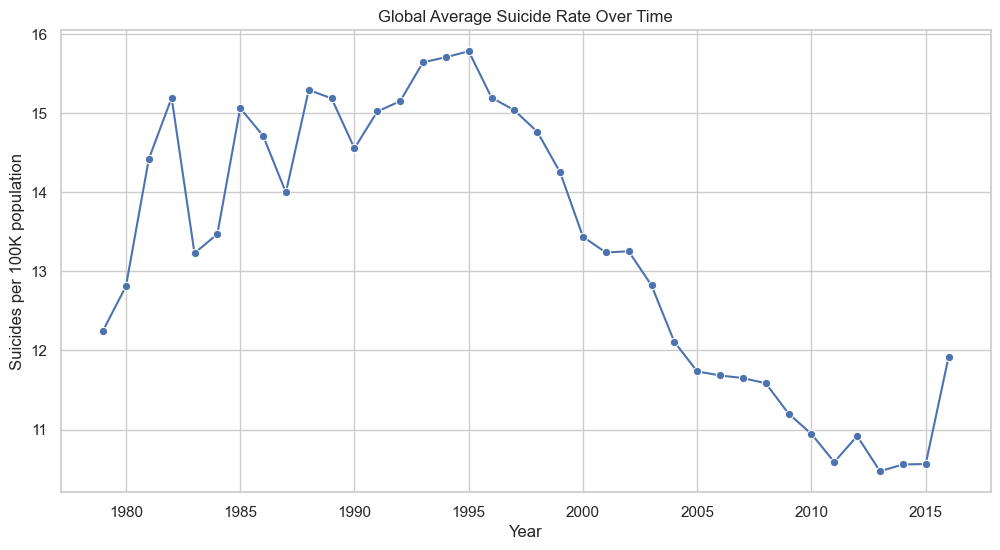

In [22]:
global_trend = df.groupby("year")["suicide_rate"].mean().reset_index().sort_values("year")


sns.lineplot(data=global_trend, x="year", y="suicide_rate", marker="o")
plt.title("Global Average Suicide Rate Over Time")
plt.xlabel("Year")
plt.ylabel("Suicides per 100K population")
plt.show()

### 📈 Global Suicide Rate Over Time

This line plot shows the average global suicide rate (per 100,000 population) from 1985 to 2016.

**Key Observations:**
- Suicide rates were highest around **1995**, peaking at approximately **16 per 100k**.
- Rates steadily **declined** until 2010, dropping below **11 per 100k**.
- A **slight increase** was observed again after 2010, rising to **~12 per 100k** in 2015.


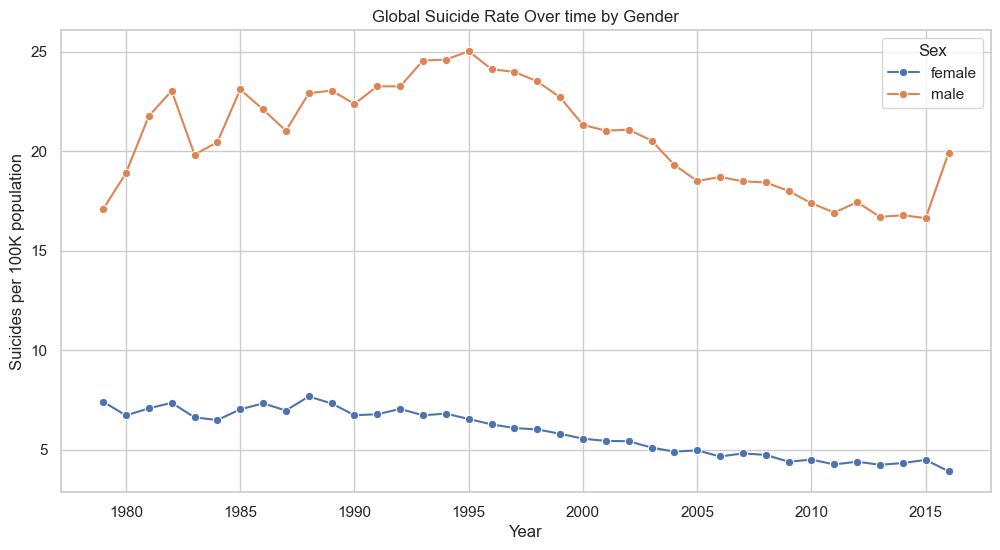

In [23]:
gender_trend = df.groupby(["year", "sex"])["suicide_rate"].mean().reset_index().sort_values("year")

sns.lineplot(data=gender_trend, x="year", y="suicide_rate", hue="sex", marker="o")
plt.title("Global Suicide Rate Over time by Gender")
plt.xlabel("Year")
plt.ylabel("Suicides per 100K population")
plt.legend(title="Sex")
plt.show()

### 👨‍🔬 Suicide Rate by Gender

This plot shows suicide trends for **males** and **females** separately.

**Insights:**
- **Male suicide rates** are consistently **2–5× higher** than female rates.
- Peak male suicide rate: **~25 per 100k in 1995**
- Female rates have remained relatively lower and **declined** steadily from **~7 to below 5** per 100k by 2015.

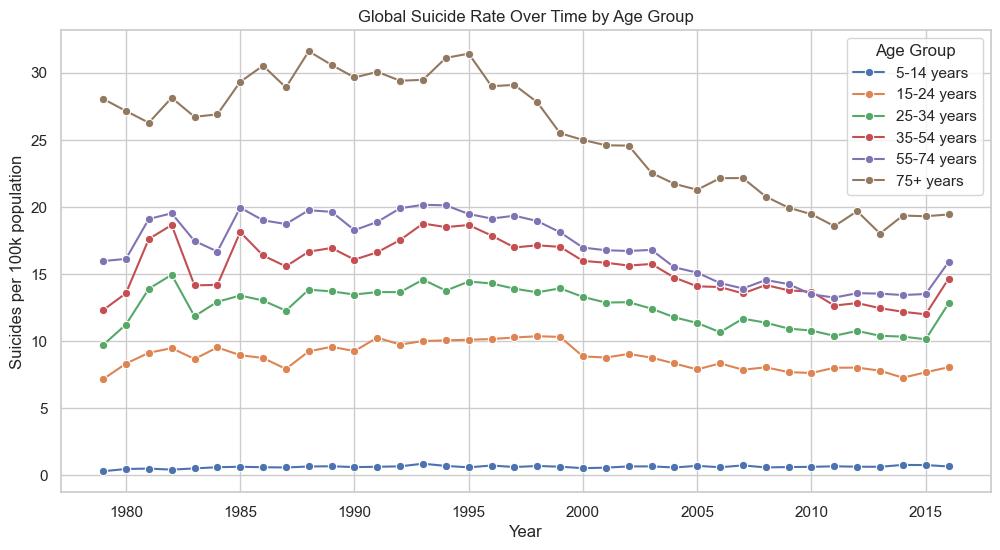

In [24]:
age_trend = df.groupby(["year","age"])["suicide_rate"].mean().reset_index().sort_values("year")

age_order = [
    "5-14 years",
    "15-24 years",
    "25-34 years",
    "35-54 years",
    "55-74 years",
    "75+ years"
]

sns.lineplot(data=age_trend, x="year", y="suicide_rate", hue="age", hue_order=age_order, marker="o")
plt.title("Global Suicide Rate Over Time by Age Group")
plt.xlabel("Year")
plt.ylabel("Suicides per 100k population")
plt.legend(title="Age Group")
plt.show()

### 🧓 Suicide Rate by Age Group (1985–2016)

This plot analyzes how suicide rates vary across different age groups over time.

**Key Observations:**
- The age group **75+ years** had the highest suicide rates globally, peaking at **~32 per 100k** in **1995**.
- The **lowest suicide rates** were consistently observed in the **5–14 years** group, with rates close to **0**.
- There is a **clear upward trend** in suicide rates with increasing age: 5-14 < 15-24 < 25-34 < 35-54 < 55-74 < 75+ 
- This indicates that **older populations** are significantly more vulnerable to suicide globally.


C:\Users\Piyusha\AppData\Local\Temp\ipykernel_9000\1840789926.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




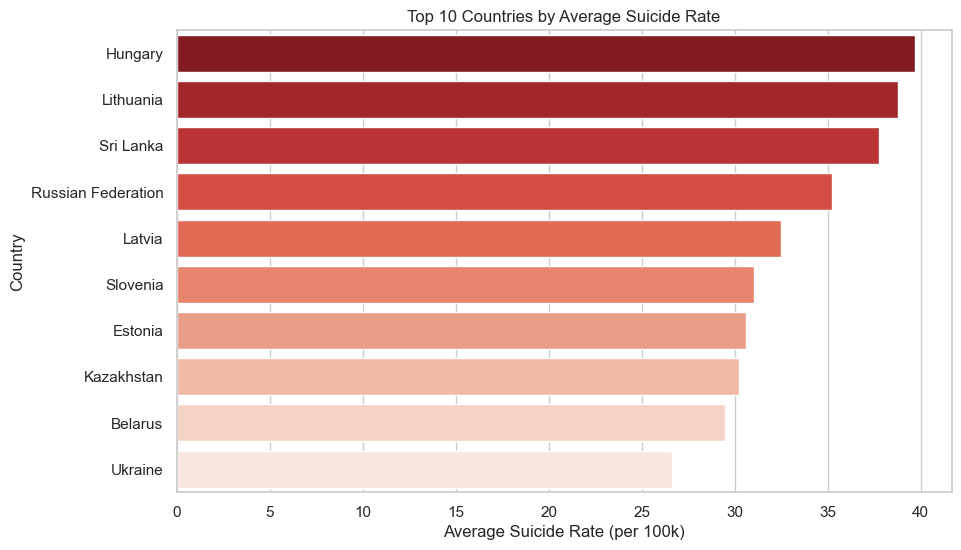

In [25]:
country_avg = df.groupby("country")["suicide_rate"].mean().reset_index()

top10 = country_avg.sort_values(by="suicide_rate", ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=top10, y="country", x="suicide_rate", palette="Reds_r")
plt.title("Top 10 Countries by Average Suicide Rate")
plt.xlabel("Average Suicide Rate (per 100k)")
plt.ylabel("Country")
plt.show()


**Insights:**
- Most of the countries with high suicide rates are from **Eastern Europe and former Soviet nations**.
- **Sri Lanka** is a notable outlier from South Asia.
- These countries may share common socio-economic factors like:
  - Political instability post-Soviet Union
  - Economic downturns
  - Mental health stigma and lack of access to care

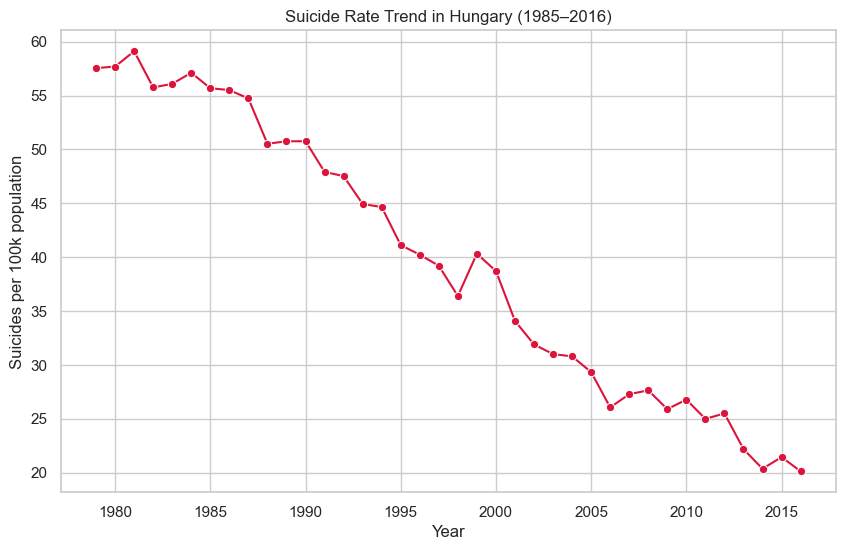

In [26]:
hungary = df[df["country"] == "Hungary"]

hungary_trend = hungary.groupby("year")["suicide_rate"].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=hungary_trend, x="year", y="suicide_rate", marker="o", color="crimson")
plt.title("Suicide Rate Trend in Hungary (1985–2016)")
plt.xlabel("Year")
plt.ylabel("Suicides per 100k population")
plt.grid(True)
plt.show()


### 🇭🇺 Suicide Rate Trend in Hungary (1985–2016)

Hungary consistently had one of the **highest suicide rates globally**, but the trend over the years reveals a **substantial decline**.

**Key Observations:**
- In the mid-1980s, suicide rates in Hungary were close to **60 per 100,000**, among the highest recorded.
- From 1985 to 2016, there has been a **steady downward trend**, falling to about **20 per 100,000** by 2016.
- This represents a **reduction of over 60%** in suicide rates over 30 years.

**Possible Contributing Factors:**
- Post-communist reforms in the 1990s may have introduced better mental health care and awareness.
- Economic stabilization and integration into the European Union may have contributed to improved social well-being.
- Greater access to healthcare, social support systems, and public health initiatives could also have played a role.

➡️ This trend is a **positive example** of how long-term societal investment in mental health and stability can reduce suicide rates.



In [27]:
import plotly.express as px

country_yearly = df.groupby(["country", "year"])["suicide_rate"].mean().reset_index().sort_values("year")

fig = px.choropleth(
    country_yearly,
    locations="country",
    locationmode="country names",
    color="suicide_rate",
    hover_name="country",
    animation_frame="year", 
    color_continuous_scale="Reds",
    range_color=(0, country_yearly["suicide_rate"].max()),
    title="🌍 Suicide Rate by Country Over Time (1985–2016)"
)

fig.update_layout(
    geo=dict(showframe=False, showcoastlines=False),
    coloraxis_colorbar=dict(title="Suicides per 100k"),
    width=1200,  
    height=700,
)

fig.show()



### 🌍 World Map – Average Suicide Rate by Country

This choropleth map visualizes global suicide rates from 1985 to 2016.

- **Deeper reds** indicate countries with higher average suicide rates.
- **Eastern Europe** and **Sri Lanka** show prominently as global hotspots.
- Countries with missing data appear blank.

This visualization highlights clear regional patterns and can spark deeper exploration into country-specific causes and interventions.


### T-Test

In [28]:
target_col = 'suicides_no'
if target_col not in df.columns:
    print(f"Column '{target_col}' not found. Available columns:")
    print(df.columns)
else:
    from scipy import stats
    
    male_rates = df[df['sex'] == 'male'][target_col]
    female_rates = df[df['sex'] == 'female'][target_col]

    t_stat, p_val = stats.ttest_ind(male_rates, female_rates, equal_var=False)

    print(f"Target Column: {target_col}")
    print(f"T-statistic: {t_stat:.4f}, P-value: {p_val:.4e}")

    if p_val < 0.05:
        print("Result: Reject Null Hypothesis (Significant difference between Male/Female).")
    else:
        print("Result: Fail to reject Null Hypothesis.")

Target Column: suicides_no
T-statistic: 26.1601, P-value: 1.8672e-148
Result: Reject Null Hypothesis (Significant difference between Male/Female).


### Pearson correlation

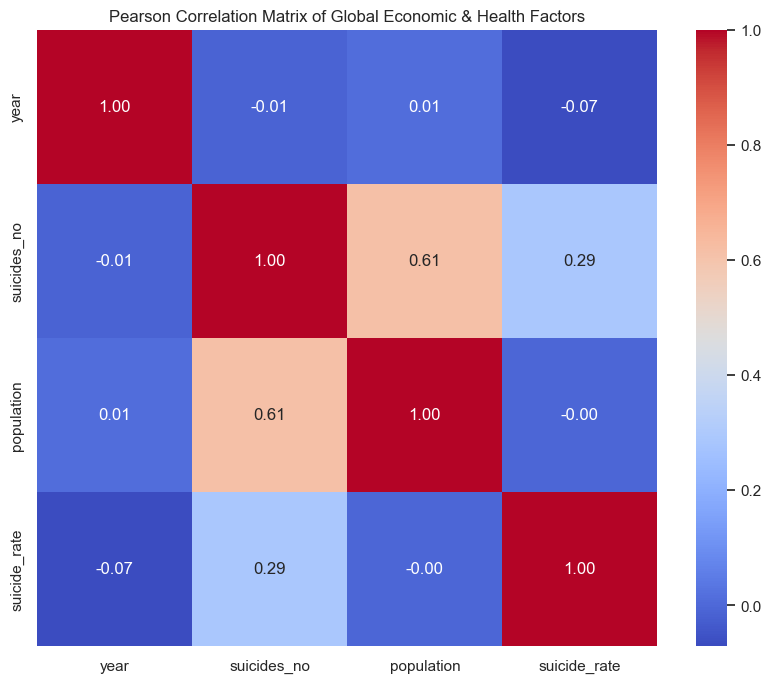

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Multivariate Analysis: Pearson Correlation Matrix
numeric_df = df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_df.corr(method='pearson')

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Pearson Correlation Matrix of Global Economic & Health Factors")
plt.show()